<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\m_panov\AppData\Local\Temp\ipykernel_16952\350792801.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [5]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


Text(0.5, 1.0, 'Boxplot of MEDV')

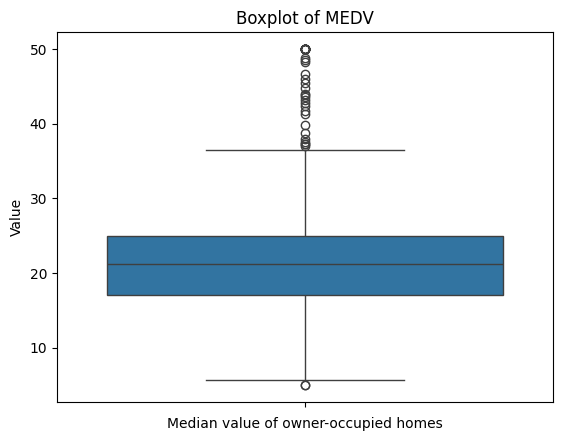

In [10]:
# For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(y = 'MEDV', data = boston_df)
pyplot.xlabel('Median value of owner-occupied homes')
pyplot.ylabel('Value')
pyplot.title('Boxplot of MEDV')

Explanation: This boxplot show the distribution of the median value of owner-occupied homes. It represents the interquartile range and the median (as the line inside the blue box). Upper line ins the upper quartile, while the lower line is the lower quartile. Outliers are shown as individual points above and below the quartile lines.

Text(0.5, 1.0, 'Bar plot of Charles river variable')

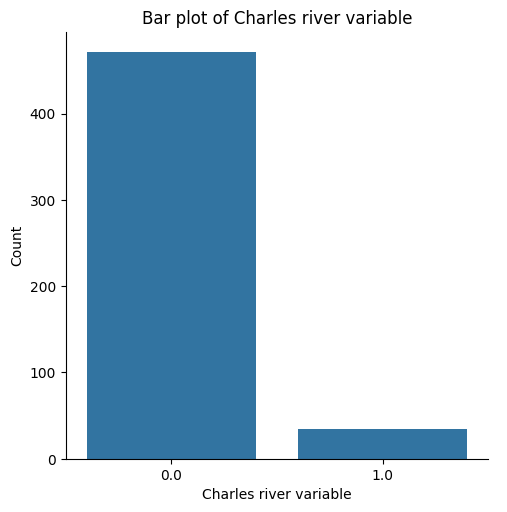

In [11]:
# Provide a  bar plot for the Charles river variable (CHAS)

sns.catplot(x = 'CHAS', kind = 'count', data = boston_df)
pyplot.xlabel('Charles river variable')
pyplot.ylabel('Count')
pyplot.title('Bar plot of Charles river variable')

Explanation: Y-axis is the count of houses, while the X-axis represent houses that are bounded by the Charles River (Value of 1) versus those that are not (Values  0). This graph visualize the number of houses bound or not to Charles River.

In [12]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 years and 70 years and older)

# Group the data into age categories

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, 'Box plot for MEDV vs Age Groups')

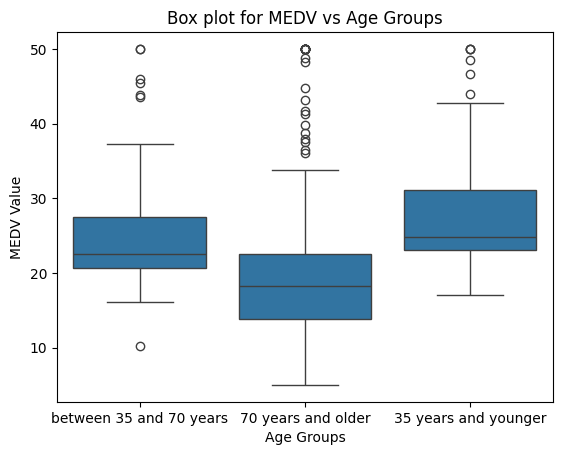

In [18]:
sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
pyplot.xlabel('Age Groups')
pyplot.ylabel('MEDV Value')
pyplot.title('Box plot for MEDV vs Age Groups')

Text(0.5, 1.0, 'Scatter plot for NOX vs INDUS')

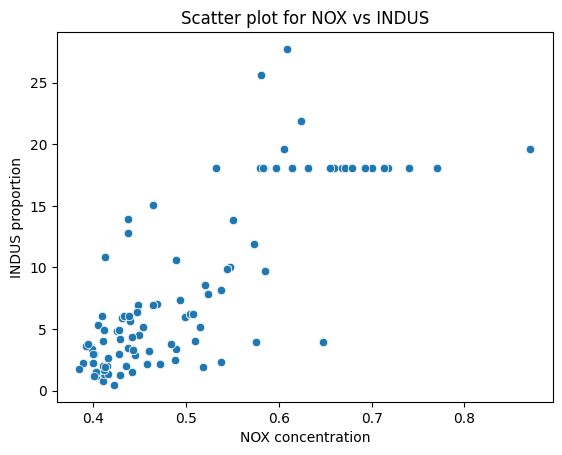

In [21]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
pyplot.xlabel('NOX concentration')
pyplot.ylabel('INDUS proportion')
pyplot.title('Scatter plot for NOX vs INDUS')

# Conslusion: There is a positive correlation between the proportion of non-retail business acres per town and Nitric oxide concentrations. 
# This suggests that as the industrialization of an area increases, the concentration of nitric oxides also tends to increase.
# Correlation is stron in the lower range.

C:\Users\m_panov\AppData\Local\Temp\ipykernel_16952\3843298462.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['PTRATIO'], kde = False)


Text(0.5, 1.0, 'Histogram for the Pupil to Teacher Ratio')

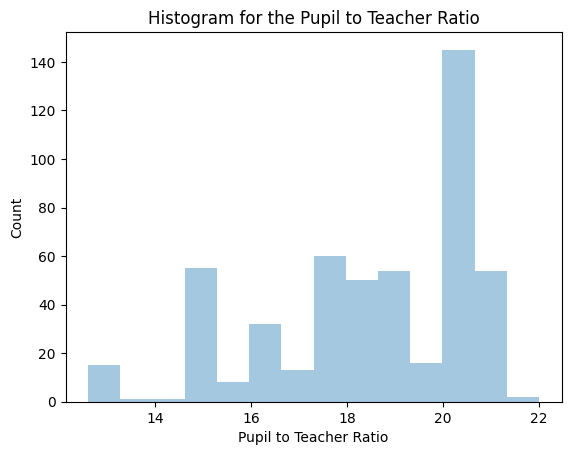

In [22]:
# Create a histogram for the pupil to teacher ratio variable

sns.distplot(boston_df['PTRATIO'], kde = False)
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Count')
pyplot.title('Histogram for the Pupil to Teacher Ratio')

In [23]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Hypothesis:
    # H0: µ1 = µ2 (there is no significant difference in median value of houses bounded by Charles river or not)
    # H1: µ1 ≠ µ2 (there is significant difference in median value of houses bounded by Charles river or not)

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: At the α = 0.05, the p-value is less than 0.05. Therefore, we reject the null hypothesis as there is evidence that the median value of houses is related to whether they are bounded by the Charles River or not.

In [25]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Hypothesis:
    # H0: µ1 = µ2 = µ3 (the three population means are equal)
    # H1: At least one of the means differ

# Test for equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                   center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [26]:
# One-way ANOVA
age_group_1 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
age_group_2 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
age_group_3 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(age_group_1, age_group_2, age_group_3)
print('F_Statistic: {0}, P-Value: {1}'.format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

In [30]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Hypothesis: Areas with higher nitric oxide concentrations tend to have a larger proportion of industrial business acres.

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

Conclusion:  Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. The p-value strongly suggests that the relationship is not due to random chance. Overall, the data suggests that areas with higher nitric oxide concentrations tend to have a larger proportion of industrial business acres.

In [37]:
# What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV)? (Regression analysis)

# Hypothesis: 

X = boston_df['MEDV']
y = boston_df['DIS']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.21e-08
Time:                        18:09:28   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: The p-value is less than 0.05, indicating that this relationship is statistically significant. However, the R-squared value is 0.062, showing that DIS only explains about 6.2% of the variability in MEDV, implying that other variables also affect MEDV. Pearson R - Correlation coefficient is 0.25.

## Appendix

<Axes: xlabel='DIS', ylabel='MEDV'>

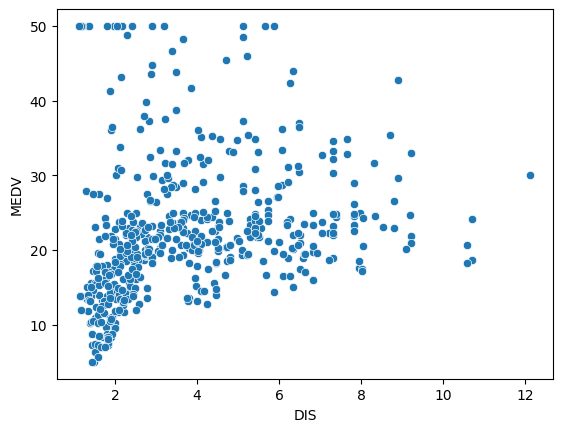

In [33]:
sns.scatterplot(x = 'DIS', y = 'MEDV', data = boston_df)

In [34]:
X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Wed, 15 May 2024   Prob (F-statistic):           7.91e-98
Time:                        18:05:27   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""